# Random Forest Algorithm
 It is Special case of Bagging where base model is Decision Tree
 It add more Randomness as compare to  bagging.
 Do not need to tune the parameter more it will give result better.
**Note:** It can be used for any machine learning problem it will give  best result always for any problems.


**Note:** It can be used for any machine learning problem it will give best result always for any problems.

**Note:** When splitting a node, it picks a random subset of features instead of considering all features.
A Random Forest = Bagging + Random feature selection at split level
In bagging when we do sampling by using columns then we do tree level but in random forest we do node level


#### Example:
Suppose  have 10 features (columns).

A plain Decision Tree looks at all 10 at every split to find the best.
Random Forest does something different:

At each split, instead of looking at all features,
it picks a random smaller subset — maybe 3 out of the 10 —
and finds the best feature just within that smaller random set.

### Why do we add the random feature split?
If  don’t add this step, and all trees are deep, they can become too similar because they’ll pick the same “best” features every time.

By forcing each split to pick from a random subset of features, trees become more diverse.

### How is Random Forest different from plain Bagging?

|  Feature         | **Bagging**                                                      | **Random Forest**                                   |
| ------------------ | ---------------------------------------------------------------- | --------------------------------------------------- |
| Base models        | Any model (commonly decision trees)                              | Decision trees only                                 |
| Bootstrap samples? | Yes (with replacement)                                         |  Yes                                               |
| Random features?   | Can do at the *model level* (`max_features`), not at split level |  Picks random subset of features at **each split** |
| Extra randomness   | Just sampling data (and optional features per model)             | Data + features at split level                      |
| OOB score          |                                                                |                                                   |
| Typical use        | General method                                                   | Special powerful method for trees                   |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [3]:
rf = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    max_features='sqrt',  # Random subset at each split
    bootstrap=True,
    oob_score=True,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [4]:
print("Test Accuracy:", rf.score(X_test, y_test))
print("OOB Score:", rf.oob_score_)

Test Accuracy: 0.8777777777777778
OOB Score: 0.8809523809523809


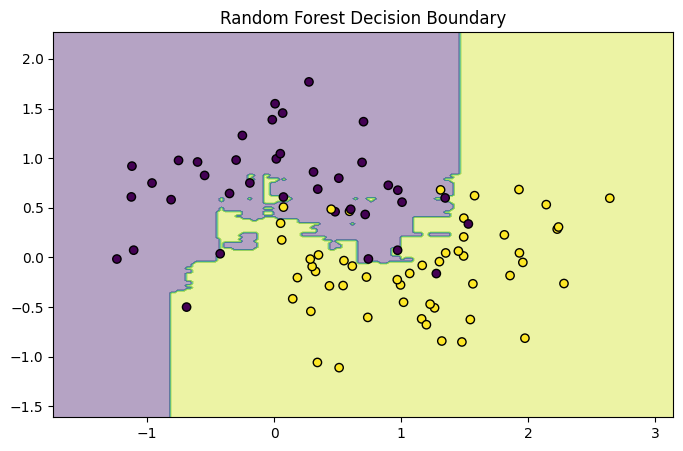

In [5]:
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)

fig, ax = plt.subplots(figsize=(8, 5))
plot_decision_boundary(rf, X_test, y_test, ax, "Random Forest Decision Boundary")
plt.show()

#### What is feature_importances_?
feature_importances_ tells you:
 **How important each feature (column) was for making the predictions.**

It’s a score for each feature — higher means the feature helped a lot in splitting the data well.
#### How does Random Forest calculate it?
Every time a feature is used to split a node, the algorithm measures how much that split helped make the groups purer (more cleanly separated).

This “help” is summed across all trees and all splits.

Finally, the importances are normalized so they add up to 1.0.

#### Why is this useful?
Feature importances help:

See which features matter most in prediction.

Drop unimportant features to simplify the model.

Understand the model’s behavior.

In [6]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Load data
X, y = load_iris(return_X_y=True)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [8]:
# Get feature importances
importances = rf.feature_importances_
print("Feature Importances:", importances)

Feature Importances: [0.10612762 0.02167809 0.43612951 0.43606478]


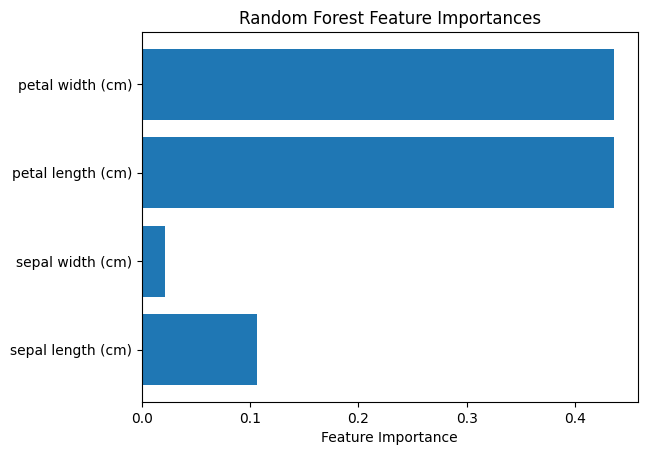

In [9]:
import matplotlib.pyplot as plt

features = load_iris().feature_names

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

## Random forest Regressor and hyper parameter tuning



In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [11]:
rf_reg = RandomForestRegressor(
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

In [12]:
param_dist_reg = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 3, 5, 7, 10],
    'max_features': ['sqrt', 'log2', 0.5, 0.8],
    'bootstrap': [True, False],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
random_search_rf_reg = RandomizedSearchCV(
    estimator=rf_reg,
    param_distributions=param_dist_reg,
    n_iter=20,          # Try 20 random combinations
    cv=5,               # 5-fold CV
    scoring='r2',       # Use R² score for regression
    n_jobs=-1,
    random_state=42
)


In [14]:
random_search_rf_reg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                                   random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 5, 7, 10],
                                        'max_features': ['sqrt', 'log2', 0.5,
                                                         0.8],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='r2')

In [15]:
print("Best hyperparameters for RandomForestRegressor (RandomizedSearchCV):")
print(random_search_rf_reg.best_params_)

print(f"Best cross-validation R²: {random_search_rf_reg.best_score_:.2f}")

Best hyperparameters for RandomForestRegressor (RandomizedSearchCV):
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': None, 'bootstrap': True}
Best cross-validation R²: 0.63


In [16]:
#  Test set R² score
best_rf_reg_random = random_search_rf_reg.best_estimator_
test_r2_random = best_rf_reg_random.score(X_test, y_test)
print(f"Test set R² with best params: {test_r2_random:.2f}")

Test set R² with best params: 0.71


In [17]:
if best_rf_reg_random.bootstrap:
    print(f" OOB Score: {best_rf_reg_random.oob_score_:.2f}")

 OOB Score: 0.64
